<a href="https://colab.research.google.com/github/Hur-Ali110/Data-Science-Internship/blob/main/Task_4_(Data_Science_Intern).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏥 Task 4: Predicting Insurance Claim Amounts

## 🎯 Objective
To build a regression model that estimates **medical insurance charges** based on personal information like **age**, **BMI**, **smoking status**, and other demographic features.

---

## 📂 Dataset
- **Name:** Medical Cost Personal Dataset
- **Records:** 1,338
- **Target Variable:** `charges` (medical insurance cost)
- **Source Columns:** `age`, `sex`, `bmi`, `children`, `smoker`, `region`

---

## 🧰 Approach

### 🔹 1. Data Preparation
- Encoded categorical variables:
  - `sex`: Male=1, Female=0
  - `smoker`: Yes=1, No=0
  - `region`: Encoded numerically (0–3)
- Split dataset into **80% training** and **20% testing**

### 🔹 2. Model Training
- Trained a **Linear Regression** model on the processed data.

### 🔹 3. Evaluation Metrics
- **MAE (Mean Absolute Error):** ~`4186.51`
- **RMSE (Root Mean Squared Error):** ~`5799.59`

---

## 📊 Visual Insights

### 💡 BMI and Charges
- Strong upward trend in charges for smokers with higher BMI.

### 💡 Age and Charges
- Medical costs increase significantly with age, especially for smokers.

### 📉 Error Analysis
- High RMSE indicates presence of **outliers** (typically smokers with extreme costs).
- MAE is more robust and gives a clearer picture of typical prediction error.

---

## 🧾 Conclusion
- **Smoking status**, **age**, and **BMI** are critical predictors of medical expenses.
- A linear model provides a reasonable baseline, but future improvements could include:
  - Polynomial regression or tree-based models
  - Log transformation of skewed features (e.g., `charges`)
  - Cross-validation for robust performance

---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('/content/Medical Cost Personal Dataset.csv')

In [3]:
# Basic inspection
print(df.head())
print("\nShape:", df.shape)
print("\nInfo:\n", df.info())
print("\nMissing values:\n", df.isnull().sum())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Info:
 None

Missing values:
 age         0
sex         0
bmi         0
child

In [4]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['sex'] = le.fit_transform(df_encoded['sex'])         # male=1, female=0
df_encoded['smoker'] = le.fit_transform(df_encoded['smoker'])   # yes=1, no=0
df_encoded['region'] = le.fit_transform(df_encoded['region'])   # regions to 0–3

In [6]:
# Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 Model Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


📊 Model Performance:
MAE: 4186.51
RMSE: 5799.59


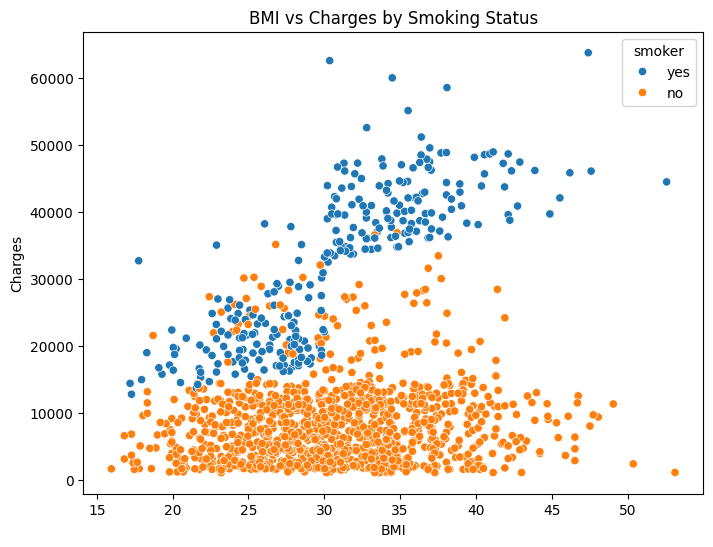

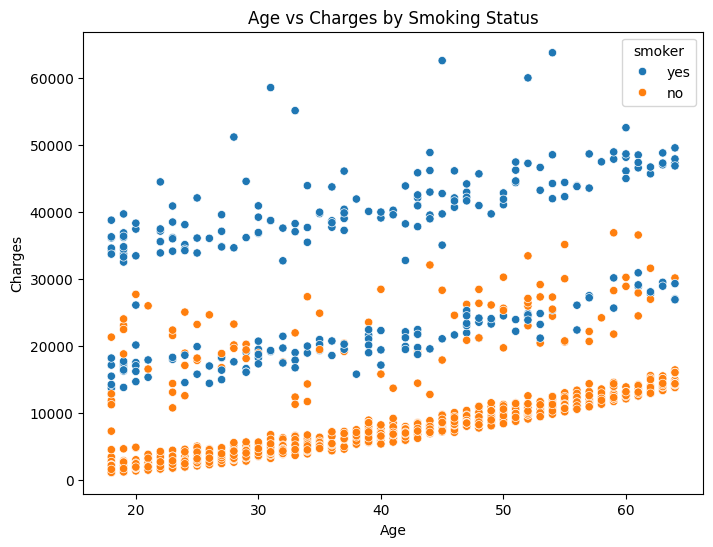

In [7]:
# Visualizations

# 1. BMI vs Charges by Smoking Status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# 2. Age vs Charges by Smoking Status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()